# Naïve bayes-2

### Q1. A company conducted a survey of its employees and found that 70% of the employees use the company's health insurance plan, while 40% of the employees who use the plan are smokers. What is the probability that an employee is a smoker given that he/she uses the health insurance plan?


To find the probability that an employee is a smoker given that he/she uses the health insurance plan, you can use conditional probability. You are looking for \(P(\text{Smoker} | \text{Uses Health Insurance})\).

You are given the following information:
- \(P(\text{Uses Health Insurance}) = 0.70\)
- \(P(\text{Smoker} | \text{Uses Health Insurance}) = 0.40\)

You can use the formula for conditional probability:

\[P(A | B) = \frac{P(A \text{ and } B)}{P(B)}\]

In this case:
- \(A\) is the event "Smoker."
- \(B\) is the event "Uses Health Insurance."

So, you want to find \(P(\text{Smoker} | \text{Uses Health Insurance})\), which can be calculated as:

\[P(\text{Smoker} | \text{Uses Health Insurance}) = \frac{P(\text{Smoker and Uses Health Insurance})}{P(\text{Uses Health Insurance})}\]

Substitute the given values:

\[P(\text{Smoker | Uses Health Insurance}) = \frac{0.40 \cdot 0.70}{0.70}\]

Now, calculate the probability:

\[P(\text{Smoker | Uses Health Insurance}) = \frac{0.28}{0.70} = 0.4\]

So, the probability that an employee is a smoker, given that he/she uses the health insurance plan, is 0.40 or 40%.

### Q2. What is the difference between Bernoulli Naive Bayes and Multinomial Naive Bayes?


Bernoulli Naive Bayes and Multinomial Naive Bayes are two different variants of the Naive Bayes classifier, and they are commonly used for different types of data:

**Bernoulli Naive Bayes:**
- Suitable for binary and categorical data.
- Assumes that features are binary (0/1) variables, typically representing the absence or presence of a feature in a document or sample.
- Often used in text classification problems, such as spam detection, where features represent the occurrence of words in a document.

**Multinomial Naive Bayes:**
- Primarily used for text classification tasks.
- Assumes that features represent the counts or frequencies of words or terms in a document.
- Works well with data where features are discrete and represent counts of occurrences, such as the frequency of words in a document.

In summary, the key difference lies in the nature of the features and the type of data they are designed to handle. Bernoulli Naive Bayes is suitable for binary and categorical features, while Multinomial Naive Bayes is designed for count-based, discrete features, especially in text classification.

### Q3. How does Bernoulli Naive Bayes handle missing values?


Bernoulli Naive Bayes typically assumes binary features (0/1), and missing values can be treated as a specific category, similar to how it handles other values. If a feature is missing for a particular sample, it is treated as if it's not present (0) for that sample. This approach is appropriate when dealing with binary data, where the absence or presence of a feature is the focus. Missing values are essentially treated as the absence of the feature in the document or sample.



### Q4. Can Gaussian Naive Bayes be used for multi-class classification?

Yes, Gaussian Naive Bayes can be used for multi-class classification. While it is often associated with binary or continuous data, it can also be extended to handle multi-class problems. In the case of multi-class classification, you would typically have more than two classes, and each class would have its own set of Gaussian (normal) distribution parameters for each feature.

Gaussian Naive Bayes assumes that the features within each class follow a Gaussian distribution (normal distribution). To apply it to multi-class problems, you would calculate the class-specific mean and variance for each feature for each class. Then, when making predictions for a new instance, you calculate the probability of the instance belonging to each class based on the Gaussian distribution parameters and choose the class with the highest probability.

### Q5. Assignment:
    
Data preparation:
    
Download the "Spambase Data Set" from the UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/
datasets/Spambase). This dataset contains email messages, where the goal is to predict whether a message
is spam or not based on several input features.

Implementation:
Implement Bernoulli Naive Bayes, Multinomial Naive Bayes, and Gaussian Naive Bayes classifiers using the
scikit-learn library in Python. Use 10-fold cross-validation to evaluate the performance of each classifier on the
dataset. You should use the default hyperparameters for each classifier.

Results:
Report the following performance metrics for each classifier:
Accuracy
Precision
Recall
F1 score
Discussion:
Discuss the results you obtained. Which variant of Naive Bayes performed the best? Why do you think that is
the case? Are there any limitations of Naive Bayes that you observed?
Conclusion:
Summarise your findings and provide some suggestions for future work.

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [6]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
spambase = fetch_ucirepo(id=94) 
  
# data (as pandas dataframes) 
X = spambase.data.features 
y = spambase.data.targets 
  
# metadata 
print(spambase.metadata) 
  
# variable information 
print(spambase.variables) 


{'uci_id': 94, 'name': 'Spambase', 'repository_url': 'https://archive.ics.uci.edu/dataset/94/spambase', 'data_url': 'https://archive.ics.uci.edu/static/public/94/data.csv', 'abstract': 'Classifying Email as Spam or Non-Spam', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 4601, 'num_features': 57, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['Class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1999, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C53G6X', 'creators': ['Mark Hopkins', 'Erik Reeber', 'George Forman', 'Jaap Suermondt'], 'intro_paper': None, 'additional_info': {'summary': 'The "spam" concept is diverse: advertisements for products/web sites, make money fast schemes, chain letters, pornography...\n\nThe classification task for this dataset is to determine whether a given email is spam or not.\n\t\nOur collecti

In [8]:
X

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.0,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.0,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78


In [9]:
y

,Class
0,1
1,1
2,1
3,1
4,1
...,...
4596,0
4597,0
4598,0
4599,0


In [10]:
df = X

In [11]:
df['Label'] = y

In [12]:
df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,Label
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [13]:
df.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,Label
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

In [15]:
# Check for missing values:
df.isnull().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

In [16]:
#for counting ham and spam

df.Label.value_counts()

0    2788
1    1813
Name: Label, dtype: int64

#### There are 2788 - ham and 1813 spam data

Text(0.5, 1.0, 'Distribution of Spam(1)  and Ham(0)')

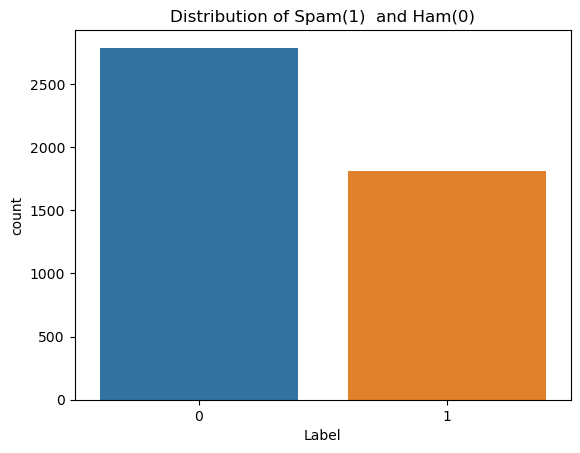

In [17]:
#plotting graph for distribution

sns.countplot(x = "Label", data = df)
plt.title('Distribution of Spam(1)  and Ham(0)')

In [18]:
# Splitting Train and Test
X.shape, y.shape

((4601, 58), (4601, 1))

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20)

In [20]:
X_train.shape, y_train.shape

((3680, 58), (3680, 1))

In [21]:
X_test.shape, y_test.shape

((921, 58), (921, 1))

### Since the dataset contains features with continous value its advisable to follow Multinomial Naive Baye's Algorithm

In [44]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold, cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [45]:
bern_NB = BernoulliNB()
gaus_NB = GaussianNB()
multi_NB =MultinomialNB()

## Model with Bernoulli Naive Baye's

In [46]:
bern_NB.fit(X_train,y_train)

BernoulliNB()

In [47]:
y_pred_B=bern_NB.predict(X_test)

In [48]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

print('Classification Report:\n',classification_report(y_test,y_pred_B))
print('------------------------------------------------')
print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred_B))
print('------------------------------------------------')
print('Test Accuracy for Bernaulli Naive Bayes is',accuracy_score(y_test,y_pred_B))

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       544
           1       0.99      0.97      0.98       377

    accuracy                           0.98       921
   macro avg       0.98      0.98      0.98       921
weighted avg       0.98      0.98      0.98       921

------------------------------------------------
Confusion Matrix:
 [[539   5]
 [ 12 365]]
------------------------------------------------
Test Accuracy for Bernaulli Naive Bayes is 0.9815418023887079


## Model with Multinomial Naive Bayes's

In [49]:
multi_NB.fit(X_train,y_train)

MultinomialNB()

In [50]:
y_pred_M=multi_NB.predict(X_test)

In [51]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

print('Classification Report:\n',classification_report(y_test,y_pred_M))
print('------------------------------------------------')
print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred_M))
print('------------------------------------------------')
print('Test Accuracy for Multinomial Naive Bayes is',accuracy_score(y_test,y_pred_M))

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.85      0.87       544
           1       0.79      0.84      0.82       377

    accuracy                           0.84       921
   macro avg       0.84      0.84      0.84       921
weighted avg       0.85      0.84      0.85       921

------------------------------------------------
Confusion Matrix:
 [[462  82]
 [ 61 316]]
------------------------------------------------
Test Accuracy for Multinomial Naive Bayes is 0.8447339847991314


## Model with Gaussian Naive Bayes's

In [52]:
gaus_NB.fit(X_train,y_train)

GaussianNB()

In [53]:
y_pred_G=multi_NB.predict(X_test)

In [54]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

print('Classification Report:\n',classification_report(y_test,y_pred_G))
print('------------------------------------------------')
print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred_G))
print('------------------------------------------------')
print('Test Accuracy for Gaussian Naive Bayes is',accuracy_score(y_test,y_pred_G))

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.85      0.87       544
           1       0.79      0.84      0.82       377

    accuracy                           0.84       921
   macro avg       0.84      0.84      0.84       921
weighted avg       0.85      0.84      0.85       921

------------------------------------------------
Confusion Matrix:
 [[462  82]
 [ 61 316]]
------------------------------------------------
Test Accuracy for Gaussian Naive Bayes is 0.8447339847991314


### Lets check the accuracy for each model with K_Fold Cross Validation:

In [55]:
models = []
models.append (('Bernoulli_NB',bern_NB))
models.append (('Multinomia_NB',multi_NB))
models.append (('Gaussian_NB',gaus_NB))

In [56]:
results = []
names =[]

for name, model in models:
    kfold=KFold(n_splits=10)
    cv_results = cross_val_score(model,X_train,y_train,cv = kfold, scoring = 'accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f"%(name,cv_results.mean())
    print(msg)
        

Bernoulli_NB: 0.979348
Multinomia_NB: 0.842663
Gaussian_NB: 0.998641


### Conclusion:

#### For Bernoulli NB: 
-- Without CV accuracy is 0.9815418023887079
-- With CV accuracy is 0.979348
__
#### For Multinomial NB: 
-- Without CV accuracy is 0.8447339847991314
-- With CV accuracy is 0.842663
__
#### For Gaussian NB: 
-- Without CV accuracy is 0.8447339847991314
-- With CV accuracy is 0.998641

#### In this case, With CV Gaussian Naive Baye's perform very well.